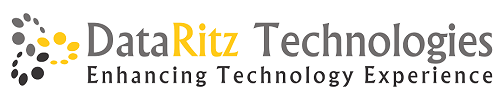

# Topics to be covered

* Universal Functions
* Searching
* Sorting
* Filtering


#  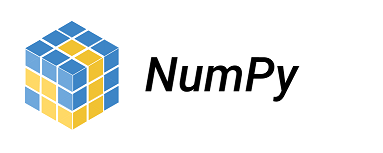

# Importing Numpy Package

In [1]:
import numpy as np

# Computation on NumPy arrays
 * #### Computation on NumPy arrays can be very fast, or it can be very slow.
 
 * #### The key to making it fast is to use vectorized operations, generally implemented through NumPy’s universal functions (ufuncs).

# What is Vectorization?

Converting iterative statements into a vector based operation is called vectorization.

It is faster as modern CPUs are optimized for such operations.

# Array arithmetic
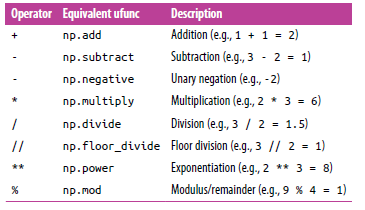

# Absolute value

In [3]:
x = np.array([-2,-1,0,1,2])
np.absolute(x)

array([2, 1, 0, 1, 2])

# Exponents and logarithms

In [4]:
# e^x
x = [1,2,3]
np.exp(x)

array([ 2.71828183,  7.3890561 , 20.08553692])

In [5]:
#2^x
x=[1,2,3]
np.exp2(x)

array([2., 4., 8.])

In [6]:
# ln(x)
x=[1,2,3]
np.log(x)

array([0.        , 0.69314718, 1.09861229])

In [7]:
np.log2(x)

array([0.       , 1.       , 1.5849625])

In [8]:
np.log10(x)

array([0.        , 0.30103   , 0.47712125])

# Advanced Ufunc Features

# 1. Specifying output

For large calculations, it is sometimes useful to be able to specify the array where the result of the calculation will be stored.

In [11]:
# Example
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)

array([ 0., 10., 20., 30., 40.])

#### if we write y = x*10 then , It create a temporary array to hold the results of x*10 , followed by a second operation copying those values into the y array

# 2. Aggregations (Reduce method)

* #### if you like to reduce an array with a particular operation, we can use the reduce method of any ufunc. 

* #### A reduce repeatedly applies a given operation to the elements of an array until only a single result remains.

In [14]:
# alling reduce on the add ufunc returns the sum of all elements in the
#array
x = np.arange(1,11)
np.add.reduce(x)

55

In [15]:
# If you like to store all intermidiate results of the computation the we can
# use accumlate().

np.add.accumulate(x)

array([ 1,  3,  6, 10, 15, 21, 28, 36, 45, 55], dtype=int32)

# Note - there are dedicated NumPy functions to compute the results 

* np.sum
* np.prod
* np.cumsum
* np.cumprod


# Aggregation functions available in NumPy

* #### Often when you are faced with a large amount of data, a first step is to compute summary statistics for the data in question.

* #### numpy provides following Aggregation function
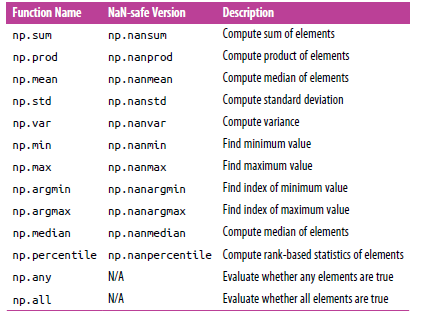

In [86]:
x = np.arange(1,101).reshape(10,10)
print(x)
x[:,[1]]

[[  1   2   3   4   5   6   7   8   9  10]
 [ 11  12  13  14  15  16  17  18  19  20]
 [ 21  22  23  24  25  26  27  28  29  30]
 [ 31  32  33  34  35  36  37  38  39  40]
 [ 41  42  43  44  45  46  47  48  49  50]
 [ 51  52  53  54  55  56  57  58  59  60]
 [ 61  62  63  64  65  66  67  68  69  70]
 [ 71  72  73  74  75  76  77  78  79  80]
 [ 81  82  83  84  85  86  87  88  89  90]
 [ 91  92  93  94  95  96  97  98  99 100]]


array([[ 2],
       [12],
       [22],
       [32],
       [42],
       [52],
       [62],
       [72],
       [82],
       [92]])

In [89]:
print(" Sum of Elements ",np.sum(x[:,[1]]))
print(" Product of Elements ",np.prod(x[:,[1]]))
print(" Mean of Elements ",np.mean(x[:,[1]]))
#Standard deviation is a number used to tell how measurements for a group 
# are spread out from the average (mean), or expected value
print(" Standard deviation ",np.std(x[:,[1]])) 
print(" Minimum Value ",np.min(x[:,[1]]))
print(" Maximum Value ",np.max(x[:,[1]])) 
print(" Meadian ",np.median(x[:,[1]]))
print("ANy elemet are True : ",np.any(x[:,[1]]))

 Sum of Elements  470
 Product of Elements  189267968
 Mean of Elements  47.0
 Standard deviation  28.722813232690143
 Minimum Value  2
 Maximum Value  92
 Meadian  47.0
ANy elemet are True True


In [52]:
# Working with nan
x = np.array([1,2,3,4,5,np.nan,6,7,8,9])
np.nanmean(x)

5.0

In [84]:
x = np.array([1,2,3,'',4,5])
def m(x):
    if x == '':
        return np.nan
    else:
        return float(x)
y = np.frompyfunc(m,1,1)
x = y(x).astype(float)
np.nanmean(x)

nan

# How To Create Your Own ufunc

#### To create you own ufunc, you have to define a function, like you do with normal functions in Python, then you add it to your NumPy ufunc library with the frompyfunc() method.

> The frompyfunc() method takes the following arguments:
* function - the name of the function.
* inputs - the number of input arguments (arrays).
* outputs - the number of output arrays.

In [19]:
# Create a ufunc which return cube of a given number

def myufunc(x):
    return x**3

In [21]:
x = np.arange(1,11)
cube = np.frompyfunc(myufunc,1,1)
cube(x)

array([1, 8, 27, 64, 125, 216, 343, 512, 729, 1000], dtype=object)

In [26]:
# Check if a Function is a ufunc
type(cube)

numpy.ufunc

In [28]:
# inbuild add ufunc
type(np.add)

numpy.ufunc

# Searching Arrays

You can search an array for a certain value, and return the indexes that get a match.

To search an array, use the where() method.

In [96]:
x = np.random.randint(1,10,size=10)
print(x)

[1 4 5 2 8 7 4 4 5 4]


In [97]:
np.where(x == 4)

(array([1, 6, 7, 9], dtype=int64),)

In [101]:
np.where(x>4)

(array([2, 4, 5, 8], dtype=int64),)

# Fast Sorting in NumPy: np.sort and np.argsort

By default np.sort uses an O(N log N)

In [117]:
# np.sort return sorted array
x = np.array([34,2,45,3,2,1,89,54])
np.sort(x)

array([ 1,  2,  2,  3, 34, 45, 54, 89])

In [120]:
# If you prefer to sort the array in-place
x.sort()
x

array([ 1,  2,  2,  3, 34, 45, 54, 89])

# Sorting along rows or columns

A useful feature of NumPy’s sorting algorithms is the ability to sort along specific rows or columns of a multidimensional array using the axis argument

In [122]:
data = np.random.randint(10,100,(10,4))
data

array([[15, 33, 22, 15],
       [34, 81, 87, 93],
       [57, 96, 13, 70],
       [28, 45, 10, 30],
       [97, 21, 45, 35],
       [56, 16, 47, 95],
       [55, 59, 20, 22],
       [20, 20, 96, 28],
       [88, 69, 12, 88],
       [96, 24, 57, 10]])

In [123]:
# Sort each column of data
np.sort(data,axis = 0)

array([[15, 16, 10, 10],
       [20, 20, 12, 15],
       [28, 21, 13, 22],
       [34, 24, 20, 28],
       [55, 33, 22, 30],
       [56, 45, 45, 35],
       [57, 59, 47, 70],
       [88, 69, 57, 88],
       [96, 81, 87, 93],
       [97, 96, 96, 95]])

In [124]:
# Sort each row of data
np.sort(data,axis = 1)

array([[15, 15, 22, 33],
       [34, 81, 87, 93],
       [13, 57, 70, 96],
       [10, 28, 30, 45],
       [21, 35, 45, 97],
       [16, 47, 56, 95],
       [20, 22, 55, 59],
       [20, 20, 28, 96],
       [12, 69, 88, 88],
       [10, 24, 57, 96]])

In [127]:
# Sort Single Column
np.sort(data[:,[1]],axis=0)

array([[16],
       [20],
       [21],
       [24],
       [33],
       [45],
       [59],
       [69],
       [81],
       [96]])

# Filtering Arrays

Getting some elements out of an existing array and creating a new array out of them is called filtering.

In NumPy, you filter an array using a boolean index list.

In [130]:
x = np.array([1,2,3,5,6])
f = [True,False,True,True,False]
x[f]

array([1, 3, 5])

In [132]:
x = np.array([1,2,3,5,6])
f = x%2==1
x[f]

array([1, 3, 5])

In [133]:
x = np.array([1,2,3,5,6])
x[x%2==1]

array([1, 3, 5])